In [517]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [518]:
data = pd.read_excel(r'C:\Users\jaisa\iris (1).xls')

In [519]:
data.shape

#150 rows 5 columns

(150, 5)

In [520]:
data = data.replace(to_replace ="Iris-setosa",
                 value ="0")
data = data.replace(to_replace ="Iris-versicolor",
                 value ="1")
data = data.replace(to_replace ="Iris-virginica",
                 value ="2")

In [521]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [522]:
# Classification column is a non numerical column which is uselss in model creation
#Converting to numeric

#data = pd.get_dummies(data)
#data.head()

array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PW'}>]], dtype=object)

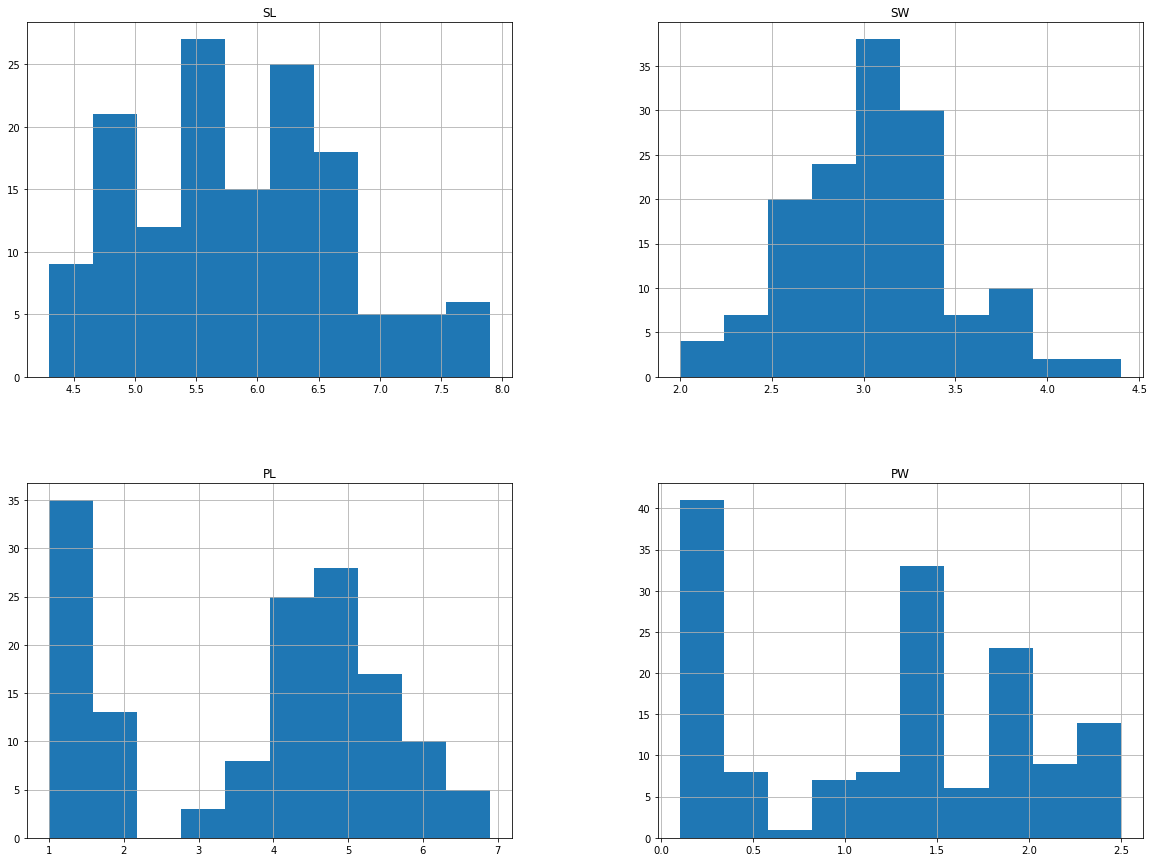

In [523]:
freqgraph = data.select_dtypes(include = ['float'])
freqgraph.hist(figsize = (20,15))

In [524]:
#looking at the distribution, we can see that it looks mostly like a normal distubution, and also like Left Skewed
#in both these cases it is safer to replace the missing values with the meadian (since it will manage the skeweness if any.)

data['SL'] = data['SL'].fillna(data['SL'].median())
data['SW'] = data['SW'].fillna(data['SW'].median())
data['PL'] = data['PL'].fillna(data['PL'].median())


In [525]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [526]:
#Check for outliers

import seaborn as sns
import pylab

In [527]:
qv1 = data['SW'].quantile(0.25)
qv2 = data['SW'].quantile(0.50)
qv3 = data['SW'].quantile(0.75)
qv_limit = 1.5*(qv3-qv1)
iqr = qv3-qv1

In [528]:
outmask = (data['SW'] > qv3 + qv_limit) | (data['SW'] < qv1 - qv_limit)
outdata = data['SW'][outmask]

Text(0, 0.5, 'SW')

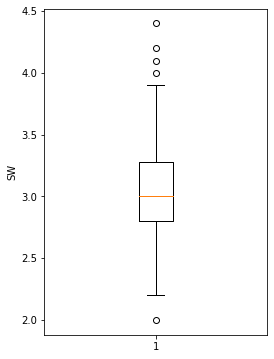

In [529]:
fig = pylab.figure(figsize=(4,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot(data['SW'])
ax.set_ylabel('SW')

# We can see a few outliers which may mis-interpret our data 

<Figure size 1152x360 with 0 Axes>

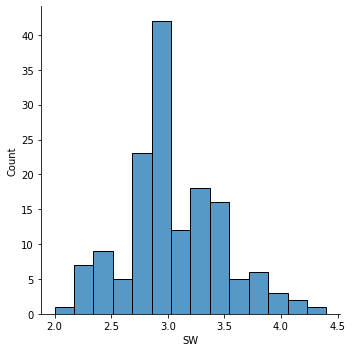

In [530]:
plt.figure(figsize=(16,5))
sns.displot(data['SW'])
plt.show()

In [531]:
percentile25 = data['SW'].quantile(0.25)
percentile75 = data['SW'].quantile(0.75)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [532]:
data['SW'] = data['SW'].clip(upper_limit,lower_limit)
# Clipping the outliers of the column - SW

Text(0, 0.5, 'SW')

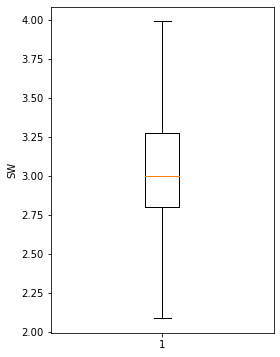

In [533]:
#Checking for outliers in column SW
fig = pylab.figure(figsize=(4,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot(data['SW'])
ax.set_ylabel('SW')

# Success - No Outliers in SW

In [534]:
#Repeating the same steps for SL, PL, PW

Text(0, 0.5, 'SL')

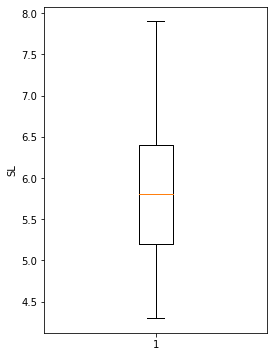

In [535]:
qv1 = data['SL'].quantile(0.25)
qv2 = data['SL'].quantile(0.50)
qv3 = data['SL'].quantile(0.75)
qv_limit = 1.5*(qv3-qv1)
iqr = qv3-qv1
outmask = (data['SL'] > qv3 + qv_limit) | (data['SL'] < qv1 - qv_limit)
outdata = data['SL'][outmask]
fig = pylab.figure(figsize=(4,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot(data['SL'])
ax.set_ylabel('SL')

#No outliers for SL

Text(0, 0.5, 'PL')

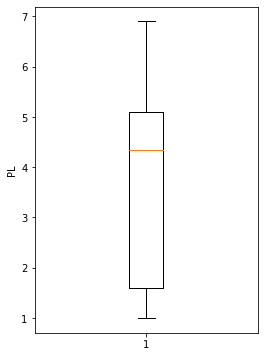

In [536]:
qv1 = data['PL'].quantile(0.25)
qv2 = data['PL'].quantile(0.50)
qv3 = data['PL'].quantile(0.75)
qv_limit = 1.5*(qv3-qv1)
iqr = qv3-qv1
outmask = (data['PL'] > qv3 + qv_limit) | (data['PL'] < qv1 - qv_limit)
outdata = data['PL'][outmask]
fig = pylab.figure(figsize=(4,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot(data['PL'])
ax.set_ylabel('PL')

#No outliers for PL

Text(0, 0.5, 'PW')

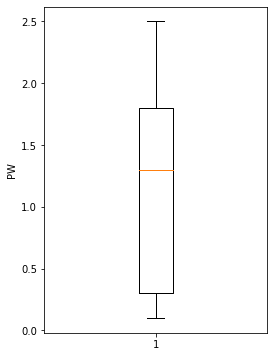

In [537]:
qv1 = data['PW'].quantile(0.25)
qv2 = data['PW'].quantile(0.50)
qv3 = data['PW'].quantile(0.75)
qv_limit = 1.5*(qv3-qv1)
iqr = qv3-qv1
outmask = (data['PW'] > qv3 + qv_limit) | (data['PW'] < qv1 - qv_limit)
outdata = data['PW'][outmask]
fig = pylab.figure(figsize=(4,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot(data['PW'])
ax.set_ylabel('PW')

#No outliers for PW

# Constructing Model

In [538]:
data.head()


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [539]:
X = data.drop(['Classification'],axis =1)
y = data.drop(['SL','SW','PL','PW'],axis =1)


In [540]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [541]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()

In [542]:
X_train.shape

(120, 4)

In [543]:
#y_train = y_train.values.flatten()
y_train.shape

(120, 1)

In [544]:
logit_model.fit(X_train,y_train)

C:\Users\jaisa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [545]:
#predicting the values in Xtest using this model
y_predictions = logit_model.predict(X_test)

In [546]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score

In [547]:
print('Accuracy is : ', accuracy_score(y_test,y_predictions))
print("Precision Score : ",precision_score(y_test, y_predictions, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_predictions, pos_label='positive',average='micro'))
print('F1 score is : ', f1_score(y_test,y_predictions,pos_label='positive',average='micro'))
# for a good model - Accuracy and f1 score should be maximum positive

Accuracy is :  1.0
Precision Score :  1.0
Recall Score :  1.0
F1 score is :  1.0


C:\Users\jaisa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\jaisa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\jaisa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [548]:
confusion_matrix(y_test,y_predictions)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [549]:
y_predictions

array(['1', '0', '2', '1', '1', '0', '1', '2', '1', '1', '2', '0', '0',
       '0', '0', '1', '2', '1', '1', '2', '0', '2', '0', '2', '2', '2',
       '2', '2', '0', '0'], dtype=object)

In [550]:
y_test

,Classification
73,1
18,0
118,2
78,1
76,1
31,0
64,1
141,2
68,1
82,1


In [551]:
y_train

,Classification
22,0
15,0
65,1
11,0
42,0
...,...
71,1
106,2
14,0
92,1


# KNN

In [552]:
from sklearn.neighbors import KNeighborsClassifier

# to find the optimum K Value
# For this we need to create the model with varied K Values
acc_values = []
neighbors = np.arange(3,15)
neighbors

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [553]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    #n_neighbors = number of neighbors. Here it is k
    #meetric = method to measure the distance
    classifier.fit(X_train,y_train)
    y_predictions = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_predictions)
    acc_values.append(acc)

C:\Users\jaisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jaisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jaisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jaisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [554]:
acc_values

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [555]:
# We can see that out of all the k values, 1 is the highest
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(X_train,y_train)
y_predictions = classifier.predict(X_test)

C:\Users\jaisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [556]:
print('Accuracy is : ', accuracy_score(y_test,y_predictions))
print("Precision Score : ",precision_score(y_test, y_predictions, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_predictions, pos_label='positive',average='micro'))
print('F1 score is : ', f1_score(y_test,y_predictions,pos_label='positive',average='micro'))
# for a good model - Accuracy and f1 score should be maximum positive

Accuracy is :  0.9666666666666667
Precision Score :  0.9666666666666667
Recall Score :  0.9666666666666667
F1 score is :  0.9666666666666667


C:\Users\jaisa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\jaisa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\jaisa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [557]:
confusion_matrix(y_test,y_predictions)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [558]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.042917,3.780000,1.198667
std,0.808567,0.407291,1.729424,0.763161
min,4.300000,2.087500,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,3.987500,6.900000,2.500000


# Decision Tree Classifiers

In [559]:
from sklearn.tree import DecisionTreeClassifier

In [560]:
dt_model = DecisionTreeClassifier()

In [561]:
dt_model.fit(X_train,y_train)
#X_train - independant variables
#y_train - dependant variables

DecisionTreeClassifier()

In [562]:
y_predictions = dt_model.predict(X_test)
print(accuracy_score(y_test,y_predictions))

1.0


In [563]:
y_test.value_counts()

Classification
2                 11
0                 10
1                  9
dtype: int64

In [564]:
confusion_matrix(y_test,y_predictions)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# SVM

In [565]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')

In [566]:
svm_linear.fit(X_train,y_train)

C:\Users\jaisa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [567]:
y_predictions = svm_linear.predict(X_test)
print(accuracy_score(y_test,y_predictions))

1.0


# Out of all the classification models - Linear Regression seems the best way to move followed by SVM, having the same results.

# As seen in the confusion matrix results - the wrong predictions are lesser than the other classification models